<a href="https://colab.research.google.com/github/SIRIGIREDDYDHANALAXMI/ML-project-1/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [0]:
#data
train = pd.read_csv("//content//drive//My Drive//FLPr//Train_dataset.csv" , encoding= "ISO-8859-1")
test = pd.read_csv("//content//drive//My Drive//FLPr//Test_dataset.csv" , encoding= "ISO-8859-1")

AxesSubplot(0.125,0.125;0.62x0.755)


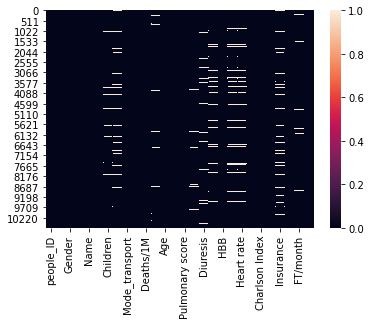

In [3]:
print(sns.heatmap(train.isnull()))

In [0]:
train["Married"]= train["Married"].astype(str)
if(train["Married"]=="NO").any():
  train["Children"]= train["Children"].fillna("0")
else:
  train["Children"]= train["Children"].fillna(train["Children"].mode()[0])

#
train["Insurance"] = train["Insurance"].fillna(train["Insurance"].mode()[0])
train["Occupation"] = train["Occupation"].fillna(train["Occupation"].mode()[0])
train["HDL cholesterol"]= train["HDL cholesterol"].fillna(train["HDL cholesterol"].mode()[0])

train["Heart rate"] = train["Heart rate"].fillna(train["Heart rate"].mode()[0])
train["HBB"] = train["HBB"].fillna(train["HBB"].mode()[0])
train["d-dimer"] = train["d-dimer"].fillna(train["d-dimer"].mode()[0])
train["Platelets"] = train["Platelets"].fillna(train["Platelets"].mode()[0])
train["d-dimer"] = train["d-dimer"].fillna(train["d-dimer"].mode()[0])
train["cardiological pressure"] = train["cardiological pressure"].fillna(train["cardiological pressure"].mode()[0])
train["Diuresis"] = train["Diuresis"].fillna(train["Diuresis"].mode()[0])
train["comorbidity"] = train["comorbidity"].fillna(train["comorbidity"].mode()[0])
train["Name"] = train["Name"].fillna(train["Name"].mode()[0])

In [0]:
if (train["salary"]>train["salary"].mean()).any():
  train["Mode_transport"] = train["Mode_transport"].fillna(train["Mode_transport"].mode()[0])
  train["FT/month"]= train["FT/month"].fillna(train["FT/month"].mode()[0])

In [6]:
train.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                   object
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder
COL =("Region","Gender","Name","Designation","Married","Occupation","Mode_transport","comorbidity","Pulmonary score","cardiological pressure")

for c in COL:
  encoder= LabelEncoder()
  encoder.fit(list(train[c].values))
  train[c] = encoder.transform(list(train[c].values))


In [8]:
train.dtypes

people_ID                   int64
Region                      int64
Gender                      int64
Designation                 int64
Name                        int64
Married                     int64
Children                   object
Occupation                  int64
Mode_transport              int64
cases/1M                    int64
Deaths/1M                   int64
comorbidity                 int64
Age                         int64
Coma score                  int64
Pulmonary score             int64
cardiological pressure      int64
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

AxesSubplot(0.125,0.125;0.62x0.755)


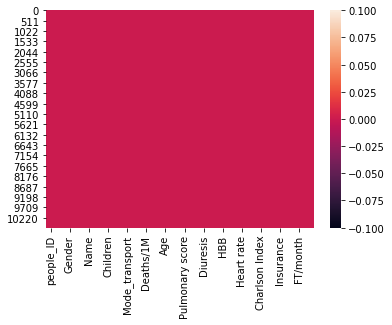

In [9]:
train["Children"]= train["Children"].astype(int)
print(sns.heatmap(train.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


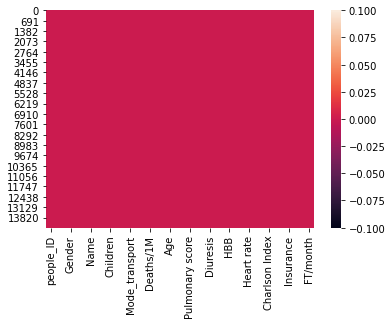

In [10]:
test["Name"]= test["Name"].fillna(test["Name"].mode()[0])
print(sns.heatmap(test.isnull()))

In [11]:
print(test.dtypes)

people_ID                  int64
Region                    object
Gender                    object
Designation               object
Name                      object
Married                   object
Children                   int64
Occupation                object
Mode_transport            object
cases/1M                   int64
Deaths/1M                  int64
comorbidity               object
Age                        int64
Coma score                 int64
Pulmonary score           object
cardiological pressure    object
Diuresis                   int64
Platelets                  int64
HBB                        int64
d-dimer                    int64
Heart rate                 int64
HDL cholesterol            int64
Charlson Index             int64
Blood Glucose              int64
Insurance                  int64
salary                     int64
FT/month                   int64
dtype: object


In [0]:
COLl =("Region","Gender","Designation","Name","Married","Occupation","Mode_transport","comorbidity","Pulmonary score","cardiological pressure")

for c in COLl:
  encoder= LabelEncoder()
  encoder.fit(list(test[c].values))
  test[c] = encoder.transform(list(test[c].values))

In [13]:
test.dtypes

people_ID                 int64
Region                    int64
Gender                    int64
Designation               int64
Name                      int64
Married                   int64
Children                  int64
Occupation                int64
Mode_transport            int64
cases/1M                  int64
Deaths/1M                 int64
comorbidity               int64
Age                       int64
Coma score                int64
Pulmonary score           int64
cardiological pressure    int64
Diuresis                  int64
Platelets                 int64
HBB                       int64
d-dimer                   int64
Heart rate                int64
HDL cholesterol           int64
Charlson Index            int64
Blood Glucose             int64
Insurance                 int64
salary                    int64
FT/month                  int64
dtype: object

In [0]:
x_train = train.iloc[:, :-1]
y= train.iloc[:, -1:]

In [15]:
x_train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,1,0,1,2707,1,1,4,1,2,0,2,68,8,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,2,1,0,1,4404,1,2,4,2,2,0,1,64,15,0,3,390.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,3,1,0,1,5741,0,1,1,1,2,0,3,19,13,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,4,1,0,1,340,1,1,3,0,2,0,0,33,9,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,5,1,0,1,868,0,2,6,0,2,0,1,23,7,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y, random_state=0)

In [0]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error


In [0]:
n_folds=5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    j=np.sqrt( -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_log_error", cv = kf))
    
    return(j)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [20]:
score = rmsle_cv(lasso)
print(score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7607.477976866416, tolerance: 71.58991488686704
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22724.32037219312, tolerance: 72.15889712634305
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5954.273112164927, tolerance: 71.29246241150443
  positive)


[0.15360399 0.14967833 0.15245002 0.15305133 0.14978664]

Lasso score: 0.1517 (0.0017)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4956.074031915574, tolerance: 73.80890284084725
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8671.36629947758, tolerance: 72.4278434726742
  positive)


In [21]:
score = rmsle_cv(ENet)
print(score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5903.281737359241, tolerance: 71.58991488686704
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20195.316226009163, tolerance: 72.15889712634305
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5055.308509071183, tolerance: 71.29246241150443
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3185.845085

[0.15359974 0.14967245 0.15244959 0.15304719 0.14978504]
ElasticNet score: 0.1517 (0.0017)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7515.602281933301, tolerance: 72.4278434726742
  positive)


In [22]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting score: 0.1569 (0.0022)



In [23]:
print(score)

[0.15320281 0.15865233 0.15918894 0.15752232 0.15568605]


In [24]:
score = rmsle_cv(model_lgb)
print(score)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.14862229 0.14825467 0.15270574 0.15080123 0.14664591]
LGBM score: 0.1494 (0.0021)



In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [26]:
averaged_models = AveragingModels(models = (ENet, lasso,model_lgb, GBoost))

score = rmsle_cv(averaged_models)
print(score)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5903.281737359241, tolerance: 71.58991488686704
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7607.477976866416, tolerance: 71.58991488686704
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

[0.14949588 0.14876856 0.15126571 0.15047806 0.14743707]
 Averaged base models score: 0.1495 (0.0013)



In [27]:
averaged_models.fit(x_train,y)
y_pred=averaged_models.predict(x_train)
y_result=averaged_models.predict(test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9904.948446671362, tolerance: 122.07305064926553
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11823.930052342126, tolerance: 122.07305064926553
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(y_result.shape)

(14498, 1)


In [30]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y, y_pred)

from math import sqrt
rmsle = np.sqrt(msle)
print(rmsle)


0.12860842607720918


In [31]:
test["people_ID"].dtype

dtype('int64')

In [32]:
y_result=pd.DataFrame(y_result)
final = pd.concat([ test['people_ID'], y_result] ,axis=1)

final.to_csv("//content//drive//My Drive//FLPr//output_file 01.csv",index=False)

print(final.head())

   people_ID          0
0       5942  54.494820
1      18664  54.727330
2       5603  54.193576
3       5649  53.904075
4       5099  54.145718
